# Getting deeper with Keras
* Tensorflow is a powerful and flexible tool, but coding large neural architectures with it is tedious.
* There are plenty of deep learning toolkits that work on top of it like Slim, TFLearn, Sonnet, Keras.
* Choice is matter of taste and particular task
* We'll be using Keras

In [107]:
from datetime import datetime

In [27]:
import sys
sys.path.append("..")
import grading

In [109]:
! killall tensorboard
import os
os.system("tensorboard --logdir=/tmp/tboard --port=7007 &");

In [28]:
# use preloaded keras datasets and models
! mkdir -p ~/.keras/datasets
! mkdir -p ~/.keras/models
! ln -s $(realpath ../readonly/keras/datasets/*) ~/.keras/datasets/
! ln -s $(realpath ../readonly/keras/models/*) ~/.keras/models/

ln: failed to create symbolic link '/home/yuri/.keras/datasets/cifar-10-batches-py.tar.gz': File exists
ln: failed to create symbolic link '/home/yuri/.keras/datasets/mnist.npz': File exists
ln: failed to create symbolic link '/home/yuri/.keras/models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5': File exists


In [29]:
import numpy as np
from preprocessed_mnist import load_dataset
import keras
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
y_train,y_val,y_test = map(keras.utils.np_utils.to_categorical,[y_train,y_val,y_test])

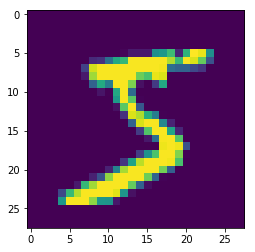

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0]);

## The pretty keras

In [31]:
import tensorflow as tf
s = tf.InteractiveSession()

/home/yuri/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [32]:
import keras
from keras.models import Sequential
import keras.layers as ll

model = Sequential(name="mlp")

model.add(ll.InputLayer([28, 28]))

model.add(ll.Flatten())

# network body
model.add(ll.Dense(25))
model.add(ll.Activation('linear'))

model.add(ll.Dense(25))
model.add(ll.Activation('linear'))

# output layer: 10 neurons for each class with softmax
model.add(ll.Dense(10, activation='softmax'))

# categorical_crossentropy is your good old crossentropy
# but applied for one-hot-encoded vectors
model.compile("adam", "categorical_crossentropy", metrics=["accuracy"])

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 25)                19625     
_________________________________________________________________
activation_7 (Activation)    (None, 25)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 25)                650       
_________________________________________________________________
activation_8 (Activation)    (None, 25)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                260       
Total para

### Model interface

Keras models follow __Scikit-learn__'s interface of fit/predict with some notable extensions. Let's take a tour.

In [34]:
# fit(X,y) ships with a neat automatic logging.
#          Highly customizable under the hood.
model.fit(X_train, y_train,
          validation_data=(X_val, y_val), epochs=15);

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 9s 176us/step - loss: 0.4081 - acc: 0.8842 - val_loss: 0.2813 - val_acc: 0.9211
Epoch 2/15
50000/50000 [==============================] - 8s 166us/step - loss: 0.3003 - acc: 0.9152 - val_loss: 0.2698 - val_acc: 0.9262
Epoch 3/15
50000/50000 [==============================] - 8s 164us/step - loss: 0.2885 - acc: 0.9190 - val_loss: 0.2704 - val_acc: 0.9274
Epoch 4/15
50000/50000 [==============================] - 9s 172us/step - loss: 0.2814 - acc: 0.9195 - val_loss: 0.2728 - val_acc: 0.9245
Epoch 5/15
50000/50000 [==============================] - 9s 178us/step - loss: 0.2750 - acc: 0.9227 - val_loss: 0.2733 - val_acc: 0.9248
Epoch 6/15
50000/50000 [==============================] - 9s 174us/step - loss: 0.2720 - acc: 0.9232 - val_loss: 0.2732 - val_acc: 0.9259
Epoch 7/15
50000/50000 [==============================] - 8s 167us/step - loss: 0.2696 - acc: 0.9241 - val_loss: 0.2700 - 

In [35]:
# estimate probabilities P(y|x)
model.predict_proba(X_val[:2])

array([[1.6966229e-05, 2.1236406e-03, 3.5856504e-02, 9.2591190e-01,
        8.9403733e-07, 1.0819340e-02, 6.7620940e-04, 1.1375442e-09,
        2.4594158e-02, 4.2686787e-07],
       [1.7006832e-06, 2.8298709e-06, 9.3857134e-03, 1.1075844e-02,
        6.6495605e-04, 2.0656880e-02, 6.9133671e-06, 8.5552182e-07,
        9.5814651e-01, 5.7784808e-05]], dtype=float32)

In [36]:
# Save trained weights
model.save("weights.h5")

In [37]:
print("\nLoss, Accuracy = ", model.evaluate(X_test, y_test))

10000/10000 [==============================] - 1s 80us/step

Loss, Accuracy =  [0.2892350155219436, 0.9244]


### Whoops!
So far, our model is staggeringly inefficient. There is something wrong with it. Guess, what?

In [38]:
# Test score...
test_predictions = model.predict_proba(X_test).argmax(axis=-1)
test_answers = y_test.argmax(axis=-1)

test_accuracy = np.mean(test_predictions==test_answers)

print("\nTest accuracy: {} %".format(test_accuracy*100))

assert test_accuracy>=0.92,"Logistic regression can do better!"
assert test_accuracy>=0.975,"Your network can do better!"
print("Great job!")


Test accuracy: 92.44 %


AssertionError: Your network can do better!

In [129]:
# my model

model = Sequential(name="mlp")

model.add(ll.InputLayer([28, 28]))

model.add(ll.Flatten())

# network body
model.add(ll.Dense(100))
model.add(ll.Activation('relu'))

model.add(ll.Dense(100))
model.add(ll.Activation('relu'))

# output layer: 10 neurons for each class with softmax
model.add(ll.Dense(10, activation='softmax'))

# categorical_crossentropy is your good old crossentropy
# but applied for one-hot-encoded vectors

# opt = keras.optimizers.SGD(0.2, 0.9, decay=0.0)

lr, be1, be2, decay = 0.003, 0.9, 0.999, 0.000
opt = keras.optimizers.Adam(lr=lr, beta_1=be1, beta_2=be2, decay=decay)
model.compile(opt, "categorical_crossentropy", metrics=["accuracy"])

# tensorboard_path = '/tmp/tboard/' + datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
param_str = '-'.join(map(str, [lr, be1, be2, decay]))
tensorboard_path = '/tmp/tboard/' + 'adam-' + param_str + "/"

In [130]:
# ! rm -r /tmp/tboard/adam-0.003-0.9-0.999-0.005/

In [131]:
# fit(X,y) ships with a neat automatic logging.
#          Highly customizable under the hood.
model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=128, epochs=15,
          callbacks=[TensorBoard(tensorboard_path)]);

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 4s 88us/step - loss: 0.2770 - acc: 0.9179 - val_loss: 0.1418 - val_acc: 0.9579
Epoch 2/15
50000/50000 [==============================] - 4s 75us/step - loss: 0.1166 - acc: 0.9645 - val_loss: 0.1094 - val_acc: 0.9648
Epoch 3/15
50000/50000 [==============================] - 4s 76us/step - loss: 0.0814 - acc: 0.9740 - val_loss: 0.0982 - val_acc: 0.9710
Epoch 4/15
50000/50000 [==============================] - 4s 78us/step - loss: 0.0624 - acc: 0.9805 - val_loss: 0.1187 - val_acc: 0.9674
Epoch 5/15
50000/50000 [==============================] - 4s 75us/step - loss: 0.0503 - acc: 0.9839 - val_loss: 0.1011 - val_acc: 0.9709
Epoch 6/15
50000/50000 [==============================] - 4s 74us/step - loss: 0.0417 - acc: 0.9865 - val_loss: 0.1269 - val_acc: 0.9679
Epoch 7/15
50000/50000 [==============================] - 4s 78us/step - loss: 0.0380 - acc: 0.9874 - val_loss: 0.1017 - val_acc

In [66]:
# Test score...
test_predictions = model.predict_proba(X_test).argmax(axis=-1)
test_answers = y_test.argmax(axis=-1)

test_accuracy = np.mean(test_predictions==test_answers)

print("\nTest accuracy: {} %".format(test_accuracy*100))

assert test_accuracy>=0.92,"Logistic regression can do better!"
assert test_accuracy>=0.975,"Your network can do better!"
print("Great job!")


Test accuracy: 97.8 %
Great job!


In [25]:
answer_submitter = grading.Grader("0ybD9ZxxEeea8A6GzH-6CA")
answer_submitter.set_answer("N56DR", test_accuracy)

In [26]:
answer_submitter.submit('trushkov.iurii@gmail.com', 'yKFVO1ewvmIb8KuQ')

Submitted to Coursera platform. See results on assignment page!


## Keras + tensorboard

Remember the interactive graphs from Tensorboard one notebook ago? 

Thing is, Keras can use tensorboard to show you a lot of useful information about the learning progress. Just take a look!

In [88]:
! rm -r /tmp/tboard/**

In [17]:
from keras.callbacks import TensorBoard
model.fit(X_train, y_train, validation_data=(X_val, y_val), 
          epochs=10,
          callbacks=[TensorBoard("/tmp/tboard")])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 7s 131us/step - loss: 0.2732 - acc: 0.9227 - val_loss: 0.2648 - val_acc: 0.9293
Epoch 2/10
50000/50000 [==============================] - 7s 135us/step - loss: 0.2695 - acc: 0.9244 - val_loss: 0.2665 - val_acc: 0.9261
Epoch 3/10
50000/50000 [==============================] - 7s 139us/step - loss: 0.2673 - acc: 0.9246 - val_loss: 0.2660 - val_acc: 0.9266
Epoch 4/10
50000/50000 [==============================] - 6s 126us/step - loss: 0.2651 - acc: 0.9255 - val_loss: 0.2750 - val_acc: 0.9254
Epoch 5/10
50000/50000 [==============================] - 6s 125us/step - loss: 0.2637 - acc: 0.9252 - val_loss: 0.2649 - val_acc: 0.9283
Epoch 6/10
50000/50000 [==============================] - 7s 130us/step - loss: 0.2620 - acc: 0.9265 - val_loss: 0.2751 - val_acc: 0.9236
Epoch 7/10
50000/50000 [==============================] - 7s 131us/step - loss: 0.2602 - acc: 0.9265 - val_loss: 0.2748 - 

# Tips & tricks

Here are some tips on what you could do. Don't worry, to reach the passing threshold you don't need to try all the ideas listed here, feel free to stop once you reach the 0.975 accuracy mark.

 * __Network size__
   * More neurons, 
   * More layers, ([docs](https://keras.io/))

   * Nonlinearities in the hidden layers
     * tanh, relu, leaky relu, etc
   * Larger networks may take more epochs to train, so don't discard your net just because it could didn't beat the baseline in 5 epochs.


 * __Early Stopping__
   * Training for 100 epochs regardless of anything is probably a bad idea.
   * Some networks converge over 5 epochs, others - over 500.
   * Way to go: stop when validation score is 10 iterations past maximum
     

 * __Faster optimization__
   * rmsprop, nesterov_momentum, adam, adagrad and so on.
     * Converge faster and sometimes reach better optima
     * It might make sense to tweak learning rate/momentum, other learning parameters, batch size and number of epochs


 * __Regularize__ to prevent overfitting
   * Add some L2 weight norm to the loss function, theano will do the rest
     * Can be done manually or via - https://keras.io/regularizers/
   
   
 * __Data augmemntation__ - getting 5x as large dataset for free is a great deal
   * https://keras.io/preprocessing/image/
   * Zoom-in+slice = move
   * Rotate+zoom(to remove black stripes)
   * any other perturbations
   * Simple way to do that (if you have PIL/Image): 
     * ```from scipy.misc import imrotate,imresize```
     * and a few slicing
   * Stay realistic. There's usually no point in flipping dogs upside down as that is not the way you usually see them.